In [44]:
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

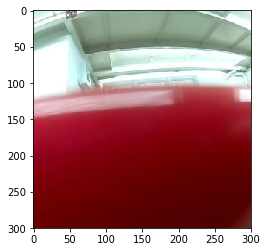

In [45]:
img = cv2.imread("resource/image_finish_line.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

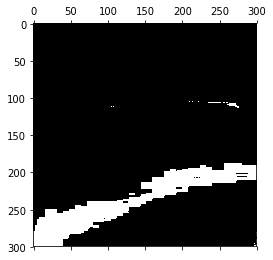

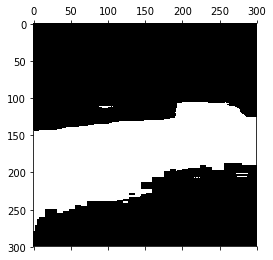

In [46]:
img_hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# lower mask (0-10)
# lower_red = np.array([0,50,50])
lower_red = np.array([0,100,100])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)
plt.matshow(mask0, cmap = 'gray')
lower_red = np.array([170,100,100])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)
plt.matshow(mask1, cmap = 'gray')

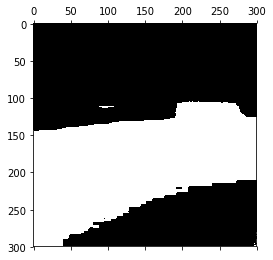

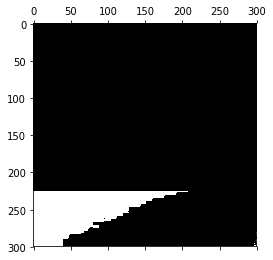

In [49]:
 # join my masks
mask = mask0+mask1

# Mask top 3/4 portion
mask_percent = 0.75
# print (mask.shape)
# print(mask)
height, width = mask.shape
# print (mask.shape)
# print("height, width", height * mask_percent, width)
# cv2.rectangle(mask, (0, 0), (160, 90), 255, -1)
plt.matshow(mask, cmap = 'gray')
mask = cv2.rectangle(mask, (0, 0), (width, int(height * mask_percent)), 0, -1)
plt.matshow(mask, cmap = 'gray')


In [50]:
tot_pixel = int(height * (1-mask_percent)) * width  # total pixel of the ROI (Region of Interest)
red_pixel = np.count_nonzero(mask)
if ((red_pixel / tot_pixel) > 0.2):
    print("{} finishing line detected".format(time.time()))
print(f"Number of red pixels: {red_pixel}")
print(f"Number of all pixels: {tot_pixel}")

1625469277.1054115 finishing line detected
Number of red pixels: 8015
Number of all pixels: 22500
